In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Fraud Detection/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

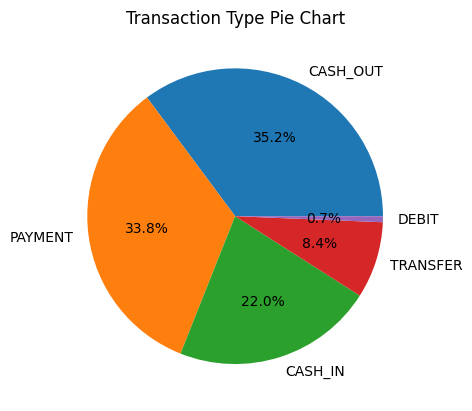

In [9]:
# plot pie chart for Transaction Type
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Transaction Type Pie Chart")
plt.show()

In [10]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
lableEncode=LabelEncoder()
df['type']=lableEncode.fit_transform(df['type'])
print(df['type'])

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64


<ipython-input-11-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

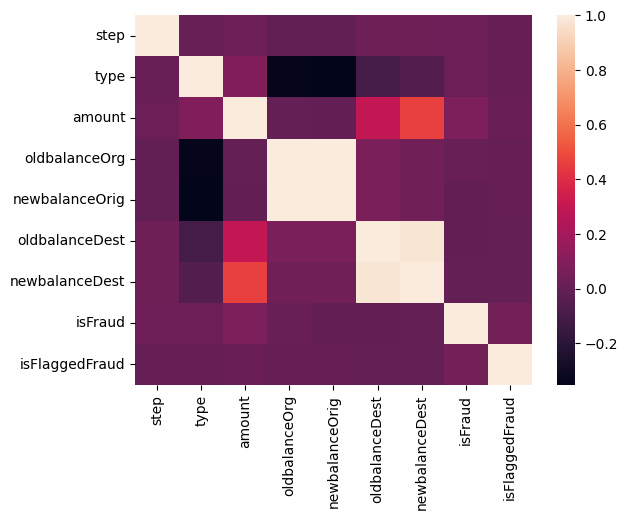

In [11]:
sns.heatmap(df.corr())

# XGBoost Without ADASYN

In [12]:
from sklearn.model_selection import train_test_split

X_res = df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y_res = df['isFraud']

X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [13]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(reg_alpha=1)


In [14]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [16]:
y_pred = xgb_model.predict(X_test)

# evaluate the performance of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy,precision,recall,f1)

0.9998040639443081 0.9733578318787321 0.8702258726899385 0.9189071986123157


# Logistic Regression Without ADASYN

In [17]:
# Training the model with Logistic Regression

from sklearn.linear_model import LogisticRegression as LR

lrmodel = LR()
lrmodel.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = lrmodel.predict(X_test)

# evaluate the performance of the model

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy,precision,recall,f1)

0.9983261612354659 0.367595818815331 0.433264887063655 0.39773798303487273


# XGBoost With ADASYN

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import xgboost as xgb

X=df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df['isFraud']
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [20]:
xgb_model = xgb.XGBClassifier(reg_alpha=1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [21]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy,precision,recall,f1)

0.9984983555353762 0.9975669851348917 0.9994345383750689 0.9984998885069973


# Logistic Regression with ADASYN

In [22]:
from sklearn.linear_model import LogisticRegression as LR

lrmodel = LR()
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy,precision,recall,f1)

0.9061145651119598 0.8521145016226915 0.9828137433402206 0.9128093650454555
